# Regressao polinomial
```
SCORE: 0.815
MAE: 101238.08
```


## TEORIA

diferente da regressão linear, a regressçao polinomial também pode ser usada para poblemas que nao sao linearmente separaveis

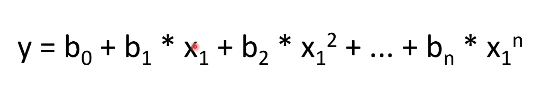

Podemos ter varios atributos tambem, aplicando multiplas vezes a mesma formula acima

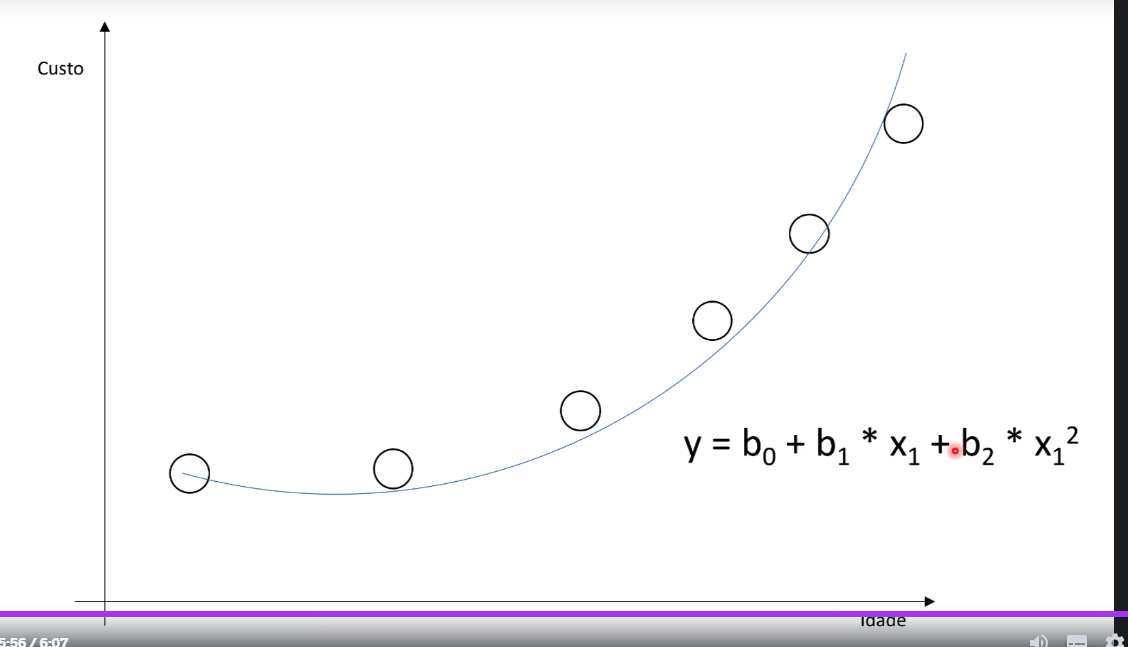

## PRATICA

### base plano saude

In [2]:
# base plano de saude 2
import pandas as pd
base_plano_saude = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/plano_saude2.csv')
base_plano_saude.head()

,idade,custo
0,18,470
1,23,520
2,28,630
3,33,830
4,38,1150


In [3]:
X_plano_saude = base_plano_saude.iloc[:, 0:1].values
y_plano_saude = base_plano_saude.iloc[:, 1].values

In [4]:
X_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [5]:
y_plano_saude

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4) # QUantas vezes quer fazer a elevação
X_plano_saude_poly = poly.fit_transform(X_plano_saude)
X_plano_saude_poly.shape

(10, 5)

In [7]:
X_plano_saude_poly # Ele cria N colunas a mais, representando o valor original elevando-se a n, n+2, ..,

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

In [8]:
# Aplixamos o mesmo algoritmo da regressão linear, mas enviando mais colunas como foi feito anteriormente
from sklearn.linear_model import LinearRegression
regressor_saude_poly = LinearRegression()
regressor_saude_poly.fit(X_plano_saude_poly, y_plano_saude)

LinearRegression()

In [9]:
#b0
regressor_saude_poly.intercept_

16561.97463791193

In [10]:
#B1(n)
regressor_saude_poly.coef_

array([ 0.00000000e+00, -2.12242253e+03,  9.90404199e+01, -1.95058276e+00,
        1.40792541e-02])

In [11]:
novo = [[40]]
novo = poly.transform(novo)

In [12]:
regressor_saude_poly.predict(novo)

array([1335.33958015])

In [13]:
previsoes = regressor_saude_poly.predict(X_plano_saude_poly)
previsoes

array([ 549.65035464,  345.85081575,  616.53845992,  975.8391595 ,
       1249.06759853, 1472.7272727 , 1894.51048941, 2973.2983677 ,
       5379.16083828, 9993.35664357])

In [14]:
import plotly.express as px
grafico = px.scatter(x = X_plano_saude[:, 0], y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude[:, 0], y = previsoes, name = 'regressao')
grafico.show()
# Agora estamos gerando uma curva, podendo ser MUITO mais precisa

### base preço casas

In [15]:
base_casas = pd.read_csv('/content/drive/MyDrive/Machine Learning e Data Science com Python de A a Z/Bases de dados/house_prices.csv')
# Primeiro vamos fazer a regrerção com o parametro X sendo apenas o metro quadrado - sqft_living
X_casas = base_casas.iloc[:, 3:19].values
y_casas = base_casas.iloc[:, 2].values
from sklearn.model_selection import train_test_split
X_casas_train, X_casas_test, y_casas_train, y_casas_test = train_test_split(X_casas, y_casas, test_size=0.3, random_state=0)

In [16]:
X_casas_train.shape, X_casas_test.shape

((15129, 16), (6484, 16))

In [17]:
poly = PolynomialFeatures(degree = 2) # APenas 2 pois a base é maior e ficaria lento
X_casas_train_poly = poly.fit_transform(X_casas_train)
X_casas_test_poly = poly.fit_transform(X_casas_test)

In [18]:
X_casas_train_poly.shape, X_casas_test_poly.shape

((15129, 153), (6484, 153))

In [19]:
regressor_casas_poly = LinearRegression()
regressor_casas_poly.fit(X_casas_train_poly, y_casas_train)

LinearRegression()

In [20]:
regressor_casas_poly.score(X_casas_train_poly, y_casas_train)

0.8179232870746764

In [21]:
regressor_casas_poly.score(X_casas_test_poly, y_casas_test)

0.8152794736736874

In [22]:
previsoes = regressor_casas_poly.predict(X_casas_test_poly)
previsoes

array([ 386125.93736267, 1990545.15264893,  578956.99684906, ...,
        433101.52619934,  234034.0341568 ,  123888.63271332])

In [23]:
y_casas_test

array([ 297000., 1578000.,  562100., ...,  380000.,  268000.,  206000.])

In [24]:
# Fazendo calculo do erro
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_casas_test, previsoes)

101238.08202969447

# Regressão com arvores de decisão


```
SCORE: 0.698
MAE: 100605.65
```


## Teoria

Basicamente a mesma coisa que arvore de decisão, mas ao inves de cair em uma classe, ele vai cair em um deterinado numero, que é calculado pela media dos valores no split em questão

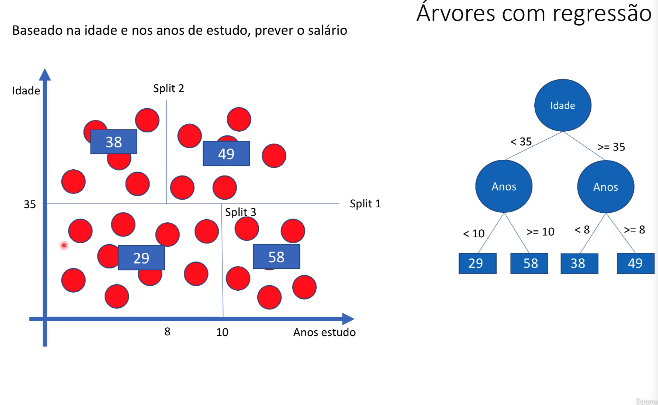

## Implementação

### base plano de saude

In [25]:
X_plano_saude # Idade

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [26]:
y_plano_saude # Custo

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor_arvore = DecisionTreeRegressor()
regressor_arvore.fit(X_plano_saude, y_plano_saude)

DecisionTreeRegressor()

In [28]:
previsoes = regressor_arvore.predict(X_plano_saude)
previsoes

array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

In [29]:
y_plano_saude

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [30]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = previsoes, name = 'regressao')
grafico.show()

In [31]:
import numpy as np
# Para visualizar os splits
X_teste_arvore = np.arange(min(X_plano_saude), max(X_plano_saude), 0.1)
X_teste_arvore = X_teste_arvore.reshape(-1, 1)

In [32]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_arvore.predict(X_teste_arvore), name = 'regressao')
grafico.show()
# Nesse grafico podemos perceber bem quais sao os intervalos de splits

### Base casas

In [33]:
X_casas_train.shape, X_casas_test.shape

((15129, 16), (6484, 16))

In [34]:
y_casas_train.shape, y_casas_test.shape

((15129,), (6484,))

In [35]:
regressor_arvore_casas = DecisionTreeRegressor()
regressor_arvore_casas.fit(X_casas_train,y_casas_train )

DecisionTreeRegressor()

In [36]:
regressor_arvore_casas.score(X_casas_train, y_casas_train)

0.9992712177726063

In [37]:
# score base dados teste
regressor_arvore_casas.score(X_casas_test, y_casas_test)

0.7565001366536023

In [38]:
previsoes = regressor_arvore_casas.predict(X_casas_test)

In [39]:
# Vendo o MAE
mean_absolute_error(y_casas_test, previsoes)

99470.41864589759

# Regressão linear Random Forest


```
SCORE: 0.88
MAE: 67724.67
```



## Teoria

- Conjunto de arvores de decisão
- Ensemble Learning: Consultar diversos algoritmos para construir um mais forte

```
previsão = media das previsões das arvores
```



## Pratica

### Base plano saude

In [41]:
X_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [42]:
y_plano_saude

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [43]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor(n_estimators = 10)
regressor_rf.fit(X_plano_saude, y_plano_saude)

RandomForestRegressor(n_estimators=10)

In [44]:
regressor_rf.score(X_plano_saude, y_plano_saude)

0.9868285238606861

In [45]:
# Para visualizar os splits
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_teste_arvore.ravel(), y = regressor_rf.predict(X_teste_arvore), name = 'regressao')
grafico.show()

In [46]:
regressor_rf.predict([[40]])

array([1391.])

### Base preço casas


In [48]:
X_casas_train.shape, X_casas_test.shape

((15129, 16), (6484, 16))

In [49]:
X_casas_train

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [50]:
y_casas_train

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [51]:
regressor_rf_casas = RandomForestRegressor(n_estimators=100)
regressor_rf_casas.fit(X_casas_train, y_casas_train)

RandomForestRegressor()

In [52]:
# Score base de treinamento
regressor_rf_casas.score(X_casas_train, y_casas_train)

0.9813249729522123

In [53]:
# Score base de teste
regressor_rf_casas.score(X_casas_test, y_casas_test)

0.8821962399769433

In [55]:
# Calculando o Mean Absolute error
previsoes = regressor_rf_casas.predict(X_casas_test)
mean_absolute_error(y_casas_test, previsoes)

67724.6727044532

# Regressão com maquinas de vetores de suporte(SVR)


```
SCORE: 0.73
MAE: 83085.3
```



## Teoria

- Ele procura o melhor hiperplano e faz a margem maxima

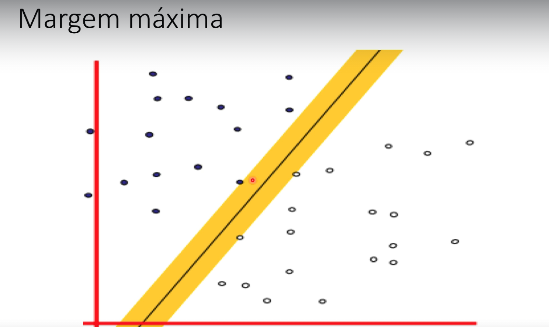

Tambem trabalhamos com não lineares

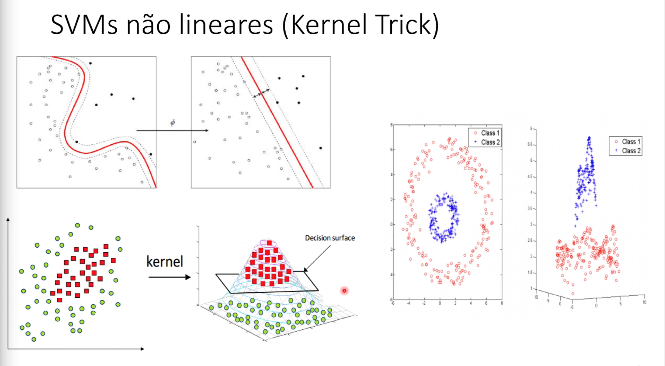

## Implementação

### Base plano saude

In [56]:
X_plano_saude

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]])

In [57]:
y_plano_saude

array([  470,   520,   630,   830,  1150,  1530,  2040,  3080,  5100,
       10100])

In [58]:
# Kernel Linear
from sklearn.svm import SVR
regressor_svr_saude = SVR(kernel = 'linear')
regressor_svr_saude.fit(X_plano_saude, y_plano_saude)

SVR(kernel='linear')

In [59]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = regressor_svr_saude.predict(X_plano_saude), name = 'regressao')
grafico.show()

Cria-se uma reta, uma vez que é o kernel **Linear**, desempenho nao é interessante

In [62]:
# Kernel polinomial

regressor_svr_saude_poly = SVR(kernel='poly', degree=4) # Mesma logica do regressor linear polinomial
regressor_svr_saude_poly.fit(X_plano_saude, y_plano_saude)

SVR(degree=4, kernel='poly')

In [63]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = regressor_svr_saude_poly.predict(X_plano_saude), name = 'regressao')
grafico.show()

Cria-se uma curva, que se aproxima mais dos resultados reais

In [64]:
# Kernel rbf
regressor_svr_saude_rbf = SVR(kernel = 'rbf')
regressor_svr_saude_rbf.fit(X_plano_saude, y_plano_saude)


SVR()

In [65]:
grafico = px.scatter(x = X_plano_saude.ravel(), y = y_plano_saude)
grafico.add_scatter(x = X_plano_saude.ravel(), y = regressor_svr_saude_rbf.predict(X_plano_saude), name = 'regressao')
grafico.show()

esse resultado acontece pois os dados nao estao normalizando, nao tinha dado problema antes pois os outros modelos ja normalizavam os dados

In [66]:
# Normalizando dados
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X_plano_saude_scaled = scaler_x.fit_transform(X_plano_saude)

scaler_y = StandardScaler()
y_plano_saude_scaled = scaler_y.fit_transform(y_plano_saude.reshape(-1, 1))

In [67]:
X_plano_saude_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [68]:
y_plano_saude_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [69]:
# Kernel rbf
regressor_svr_saude_rbf = SVR(kernel = 'rbf')
regressor_svr_saude_rbf.fit(X_plano_saude_scaled, y_plano_saude_scaled.ravel())

SVR()

In [72]:
grafico = px.scatter(x = X_plano_saude_scaled.ravel(), y = y_plano_saude_scaled.ravel())
grafico.add_scatter(x = X_plano_saude_scaled.ravel(), y = regressor_svr_saude_rbf.predict(X_plano_saude_scaled), name = 'regressao')
grafico.show()

Agora temos uma curva que acompanha melhor os dados

In [74]:
# Fazendo uma previsão com os valores normalizados
novo = [[40]]
novo = scaler_x.transform(novo) # normalizando para prever
previsao = regressor_svr_saude_rbf.predict(novo)
previsao_legivel = scaler_y.inverse_transform(previsao.reshape(-1,1)) # Conversão inversa do valor previsto para ficar legivel
previsao_legivel

array([[1333.85650748]])

### Base preço das casas

In [77]:
X_casas_train

array([[ 4.00000e+00,  1.50000e+00,  1.39000e+03, ...,  9.81330e+04,
         4.77224e+01, -1.22332e+02],
       [ 3.00000e+00,  1.50000e+00,  1.45000e+03, ...,  9.81330e+04,
         4.77725e+01, -1.22349e+02],
       [ 5.00000e+00,  2.75000e+00,  2.86000e+03, ...,  9.80520e+04,
         4.77082e+01, -1.22104e+02],
       ...,
       [ 3.00000e+00,  2.25000e+00,  2.36000e+03, ...,  9.80420e+04,
         4.73856e+01, -1.22158e+02],
       [ 4.00000e+00,  2.00000e+00,  2.37000e+03, ...,  9.80010e+04,
         4.72831e+01, -1.22279e+02],
       [ 4.00000e+00,  2.25000e+00,  2.38000e+03, ...,  9.80080e+04,
         4.76126e+01, -1.22120e+02]])

In [78]:
y_casas_train

array([400000., 430000., 720000., ..., 431000., 411000., 699900.])

In [80]:
# Vamos escalonar os dados para usar SVR
# Base train
scaler_x_casas = StandardScaler()
X_casas_train_scaled = scaler_x_casas.fit_transform(X_casas_train)
scaler_y_casas = StandardScaler()
y_casas_train_scaled = scaler_y_casas.fit_transform(y_casas_train.reshape(-1,1))

In [81]:
# Base test
X_casas_test_scaled = scaler_x_casas.fit_transform(X_casas_test)
y_casas_test_scaled = scaler_y_casas.fit_transform(y_casas_test.reshape(-1,1))

In [82]:
regressor_svr_casas = SVR(kernel='rbf')
regressor_svr_casas.fit(X_casas_train_scaled, y_casas_train_scaled.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR()

In [83]:
regressor_svr_casas.score(X_casas_train_scaled, y_casas_train_scaled)

0.8123337393146999

In [84]:
# Caclulando o score
regressor_svr_casas.score(X_casas_test_scaled, y_casas_test_scaled)

0.7339158652152076

In [87]:
# Calculando o MAE
previsoes = regressor_svr_casas.predict(X_casas_test_scaled)
# Previsamos converter os resultados para ficarem na escala de serem interpretadas no MAe
y_casas_test_inverse = scaler_y_casas.inverse_transform(y_casas_test_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1,1))
mean_absolute_error(y_casas_test_inverse,previsoes_inverse )

83085.30908154699

# Redes Neurais artificiais

```
SCORE: 0.87
MAE: 78020.25
```



## Base plano saude

Assim como no SVM, precisamos normalizar os resultados

In [88]:
X_plano_saude_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [90]:
y_plano_saude_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [92]:
from sklearn.neural_network import MLPRegressor
regressor_rede_saude = MLPRegressor(max_iter=1000)
regressor_rede_saude.fit(X_plano_saude_scaled, y_plano_saude_scaled.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(max_iter=1000)

In [93]:
regressor_rede_saude.score(X_plano_saude_scaled, y_plano_saude_scaled)

0.9695526127950935

In [94]:
grafico = px.scatter(x = X_plano_saude_scaled.ravel(), y = y_plano_saude_scaled.ravel())
grafico.add_scatter(x = X_plano_saude_scaled.ravel(), y = regressor_rede_saude.predict(X_plano_saude_scaled), name = 'regressao')
grafico.show()

In [96]:
# Fazendo previsao
novo = [[40]]
novo = scaler_x.transform(novo)
previsao = regressor_rede_saude.predict(novo)
previsao_legivel = scaler_y.inverse_transform(previsao.reshape(-1,1))
previsao_legivel

array([[1147.08804367]])

## Base preço das casas

In [99]:
X_casas_train_scaled.shape, X_casas_test_scaled.shape

((15129, 16), (6484, 16))

In [100]:
y_casas_train_scaled.shape, y_casas_test_scaled.shape

((15129, 1), (6484, 1))

In [101]:
# (16 + 2) / 2 = 8.5 redes ocultas
regressor_rede_casas = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9)) # max é o numero de iterações ate achar o peso, hidden é o numero de neuronios nas camadas de saida
regressor_rede_casas.fit(X_casas_train_scaled, y_casas_train_scaled.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

In [102]:
# Score base treinamento
regressor_rede_casas.score(X_casas_train_scaled, y_casas_train_scaled)

0.8874418478374847

In [103]:
# Score base teste
regressor_rede_casas.score(X_casas_test_scaled, y_casas_test_scaled)

0.8741838836576106

In [104]:
# Calculando o MAE
previsoes = regressor_rede_casas.predict(X_casas_test_scaled)
# Previsamos converter os resultados para ficarem na escala de serem interpretadas no MAe
y_casas_test_inverse = scaler_y_casas.inverse_transform(y_casas_test_scaled)
previsoes_inverse = scaler_y_casas.inverse_transform(previsoes.reshape(-1,1))
mean_absolute_error(y_casas_test_inverse,previsoes_inverse )

78020.25981150253

# Avaliação de algorimos





basicamente a mesma coisa que fizemos em classificação, usa validação cruzada e as tecnicas para comparar algoritmos, tambem podemos usar combinação e rejeição dos regressores com base no mean absolute error, segue abaixo o texto do professor



```
Avaliação de algoritmos de regressão
Opa, tudo certo?

Durante as aulas sobre regressão você aprendeu que pode utilizar a métrica score para avaliar o desempenho de um algoritmo de regressão, juntamente com o cálculo do mean_absolute_error para comparar os resultados previstos com os resultados reais. Para uma correta avaliação de um algoritmo você pode seguir os mesmos passos apresentados nas aulas sobre classificação, ou seja:

Utilizar validação cruzada ao invés de dividir a base em porções para treinamento e teste

Executar pelo menos 30 testes com cada algoritmo, utilizando o valor retornado pelo score (opcionalmente você pode usar o mean_absolute_error)

Construir a planilha com os resultados, calculando a média dos 30 testes de cada algoritmo

Fazer os testes de Friedmann e Nemenyi para verificar se existe diferença estatística significativa entre os resultados

Por fim, por meio dos resultados escolher o melhor algoritmo

No módulo sobre classificação também foram apresentados os conceitos sobre combinação e rejeição de classificadores, que também podem ser utilizados para problemas de regressão. As diferenças são:

Na combinação de regressores, você deve obter o valor da previsão numérica de cada algoritmo e calcular a média para calcular o valor final

Na rejeição de regressores, você pode estipular um valor mínimo para o mean_absolute_error, e caso o valor previsto seja maior que esse parâmetro você pode ignorar a resposta do regressor
```